In [22]:
#Neel Patel

import numpy as np
import pandas as pd
import openpyxl
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import scipy
plt.style.use('seaborn-poster')

#This ignores the deprecation warning as Shapely is deprecating
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)  

#https://medium.com/analytics-vidhya/how-to-extract-information-from-your-excel-sheet-using-python-5f4f518aec49
#https://www.census.gov/data/datasets/2020/demo/saipe/2020-state-and-county.html
poverty_data = openpyxl.load_workbook("Poverty.xlsm")
poverty_sheet = poverty_data["est20ALL"]

dict_county_pov = {}
dict_county_percent_pov = {}
dict_county_income_pov = {}
dict_county_poverty_FIPS = {}

county_names = []

#data organization for poverty
for row in range(6, 73):
    
    #add data into dictionary for easy comparison 
    #format: name : #people in poverty // percent of people in poverty // median income
    dict_county_pov.update({poverty_sheet["C" + str(row)].value : poverty_sheet["D" + str(row)].value})
    dict_county_percent_pov.update({poverty_sheet["C" + str(row)].value : poverty_sheet["G" + str(row)].value})
    dict_county_income_pov.update({poverty_sheet["C" + str(row)].value : poverty_sheet["V" + str(row)].value})
    
    dict_county_poverty_FIPS.update({poverty_sheet["C" + str(row)].value : poverty_sheet["A" + str(row)].value})
    
    county_names.append(poverty_sheet["C" + str(row)].value)


#Put dictionaries into numpy arrays to be used for graphing
county_pov = list(dict_county_pov.values())
county_pov = np.array(county_pov)

county_percent_pov = list(dict_county_percent_pov.values())
county_percent_pov = np.array(county_percent_pov)

county_income_pov = list(dict_county_income_pov.values())
county_income_pov = np.array(county_income_pov)

county_poverty_FIPS = list(dict_county_poverty_FIPS.values())

In [23]:
#https://www.statecancerprofiles.cancer.gov/incidencerates/index.php?stateFIPS=12&areatype=county&cancer=001&race=00&sex=0&age=001&stage=999&year=0&type=incd&sortVariableName=rate&sortOrder=default#results

#Data organization for cancer
cancer_data = openpyxl.load_workbook("Cancer.xlsm")
cancer_sheet = cancer_data["Cancer"]

dict_county_cancer_rate = {}
dict_county_cancer_total = {}
dict_county_cancer_percent = {}
dict_county_cancer_FIPS = {}

#Insert data values into list and dictionary for comparison
for row in range(3, 70):
    
    #format: name : rate  cancer per 100k , average # of people with cancer
    dict_county_cancer_rate.update({cancer_sheet["A" + str(row)].value : cancer_sheet["C" + str(row)].value})
    dict_county_cancer_total.update({cancer_sheet["A" + str(row)].value : cancer_sheet["I" + str(row)].value})
    dict_county_cancer_percent.update({cancer_sheet["A" + str(row)].value : cancer_sheet["S" + str(row)].value})
    
    dict_county_cancer_FIPS.update({cancer_sheet["A" + str(row)].value : cancer_sheet["B" + str(row)].value})

#Put dictionaries into numpy arrays 
county_cancer_rate = list(dict_county_cancer_rate.values())
county_cancer_rate = np.array(county_cancer_rate)

county_cancer_total = list((dict_county_cancer_total.values()))
county_cancer_total = np.array(county_cancer_total)

county_cancer_percent = list(dict_county_cancer_percent.values())
county_cancer_percent = np.array(county_cancer_percent)

county_cancer_FIPS = list(dict_county_cancer_FIPS.values())

In [24]:
#Create class for graphing
class graph():

    def __init__(self, a, b):
        
        self.a = a
        self.b = b
        self.specific = ""
    
    #method determines which label will be used in plot method. Must be used before plot()
    def code(self):
        if self.a.sum() == county_pov.sum() and self.b.sum() == county_cancer_rate.sum():
            return "a"
        
        elif self.a.sum() == county_pov.sum() and self.b.sum() == county_cancer_total.sum():
            return "b"
        
        elif self.a.sum() == county_pov.sum() and self.b.sum() == county_cancer_percent.sum():
            return "c"
    
        elif self.a.sum() == county_percent_pov.sum() and self.b.sum() == county_cancer_rate.sum():
            return "d"
        
        elif self.a.sum() == county_percent_pov.sum() and self.b.sum() == county_cancer_total.sum():
            return "e"
        
        elif self.a.sum() == county_percent_pov.sum() and self.b.sum() == county_cancer_percent.sum():
            return "f"
        
        elif self.a.sum() == county_income_pov.sum() and self.b.sum() == county_cancer_rate.sum():
            return "g"
        
        elif self.a.sum() == county_income_pov.sum() and self.b.sum() == county_cancer_total.sum():
            return "h"
        
        elif self.a.sum() == county_income_pov.sum() and self.b.sum() == county_cancer_percent.sum():
            return "i"
    
    #based on key from plot, return graph
    def plot(self, code):
        if code == "a":
            #Label graph
            plt.xlabel("Poverty Estimate, All Ages (People)")
            plt.ylabel("Age-Adjusted Incidence Rate - cases per 100,000 (People/100k Cases)")
            plt.title(f"Poverty Estimate, All Ages vs. Age-Adjusted Incidence Rate")
        
        if code == "b":
            plt.xlabel("Poverty Estimate, All Ages (People)")
            plt.ylabel("Average Annual Cancer Count (People)")
            plt.title(f"Poverty Estimate, All Ages vs. Average Annual Cancer Count")
            
        if code == "c":
            plt.xlabel("Poverty Estimate, All Ages (People)")
            plt.ylabel("Percent of People with Cancer (People/Population)")
            plt.title(f"Poverty Estimate, All Ages vs. Percent of People with Cancer")
        
        if code == "d":
            plt.xlabel("Poverty Percent, All Ages (Poverty/Population)")
            plt.ylabel("Age-Adjusted Incidence Rate - cases per 100,000 (People/100k Cases)")
            plt.title(f"Poverty Percent, All Ages vs. Age-Adjusted Incidence Rate")
            
        if code == "e":
            plt.xlabel("Poverty Percent, All Ages (Poverty/Population)")
            plt.ylabel("Average Annual Cancer Count (People)")
            plt.title(f"Poverty Percent, All Ages vs. Average Annual Cancer Count")
            
        if code == "f":
            plt.xlabel("Poverty Percent, All Ages (Poverty/Population)")
            plt.ylabel("Percent of People with Cancer (People/Population)")
            plt.title(f"Poverty Percent, All Ages vs. Average Percent of People with Cancer")
        
        if code == "g":
            plt.xlabel("Median Household Income (USD)")
            plt.ylabel("Age-Adjusted Incidence Rate - cases per 100,000 (People/100k Cases)")
            plt.title(f"Median Household Income vs. Age-Adjusted Incidence Rate")
            
        if code == "h":
            plt.xlabel("Median Household Income (USD)")
            plt.ylabel("Average Annual Cancer Count (People)")
            plt.title(f"Median Household Income vs. Average Annual Cancer Count")
            
        if code == "i":
            plt.xlabel("Median Household Income (USD)")
            plt.ylabel("Percent of People with Cancer (People/Population)")
            plt.title(f"Median Household Income vs. Percent of People with Cancer")
            
        plt.plot(self.a, self.b, "b.")
        m, b = np.polyfit(self.a, self.b, 1)
        plt.plot(self.a, m * self.a + b, "r")
        
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(self.a, self.b)
        r2 = r_value ** 2
        
        return (f"Your line of best fit is y = {m}x + {b}. The R^2 value is {r2}")

In [25]:
compare1 = graph(county_percent_pov, county_cancer_percent)

In [26]:
compare1.code()

'f'

'Your line of best fit is y = -0.0104610687971653x + 0.8282598820061433. The R^2 value is 0.06216919397145607'

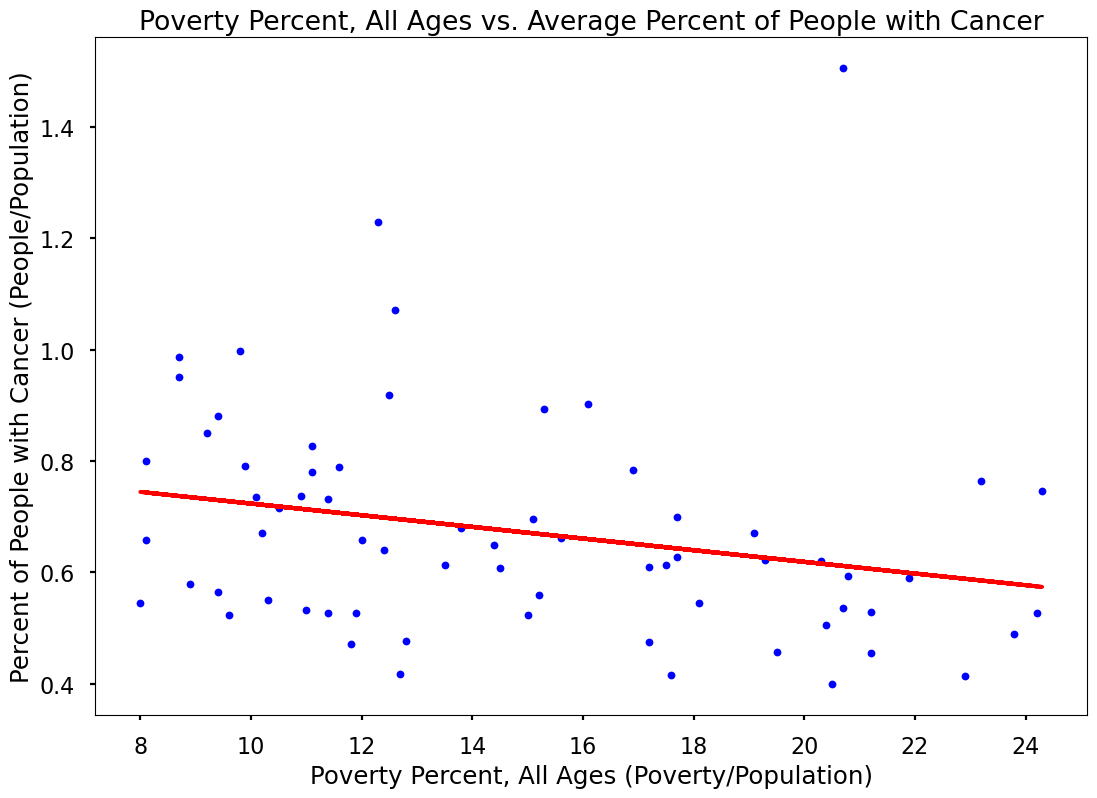

In [27]:
compare1.plot("f")

In [28]:
#use code from plotly as template for county graphing
df_sample = pd.read_excel("Cancer.xlsm")
df_sample_r = df_sample[df_sample["STATE"] == 'Florida']

#Assign FIPS values and actual data association
values = county_cancer_total
fips = county_cancer_FIPS

endpts = list(np.mgrid[min(values):max(values):5j])
colorscale = ["#030512","#1d1d3b","#323268","#3d4b94","#3e6ab0",
              "#4989bc","#60a7c7","#85c5d3","#b7e0e4","#eafcfd"]

#Crate map with specific key
#Create map for Average annual Cancer Count by County
fig = ff.create_choropleth(
    fips = fips, values = values, scope=['Florida'], show_state_data = True,
    colorscale = colorscale, binning_endpoints = [30, 100, 200, 500, 1000, 3000, 5000, 10000], round_legend_values = True,
    plot_bgcolor = 'rgb(229,229,229)',
    paper_bgcolor = 'rgb(229,229,229)',
    legend_title = 'Average Annual Cancer Count by County',
    county_outline = {'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format = True,
)
fig.layout.template = None
fig.show()

ImportError: geopandas, pyshp and shapely must be installed for this figure factory.

Run the following commands to install the correct versions of the following modules:

```
$ pip install geopandas==0.3.0
$ pip install pyshp==1.2.10
$ pip install shapely==1.6.3
```
If you are using Windows, follow this post to properly install geopandas and dependencies:http://geoffboeing.com/2014/09/using-geopandas-windows/

If you are using Anaconda, do not use PIP to install the packages above. Instead use conda to install them:

```
$ conda install plotly
$ conda install geopandas
```

In [29]:
values = county_pov
fips = county_poverty_FIPS

endpts = list(np.mgrid[min(values):max(values):5j])
colorscale = ["#030512","#1d1d3b","#323268","#3d4b94","#3e6ab0",
              "#4989bc","#60a7c7","#85c5d3","#b7e0e4","#eafcfd"]

#Crate map with specific key
#Create map for Poverty Estimate by County
fig = ff.create_choropleth(
    fips = fips, values = values, scope = ['Florida'], show_state_data = True,
    colorscale = colorscale, binning_endpoints = [5000, 10000, 20000, 50000, 100000, 200000, 500000], round_legend_values = True,
    plot_bgcolor = 'rgb(229,229,229)',
    paper_bgcolor = 'rgb(229,229,229)',
    legend_title = 'Poverty Estimate by County',
    county_outline = {'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format = True,
)
fig.layout.template = None
fig.show()

ImportError: geopandas, pyshp and shapely must be installed for this figure factory.

Run the following commands to install the correct versions of the following modules:

```
$ pip install geopandas==0.3.0
$ pip install pyshp==1.2.10
$ pip install shapely==1.6.3
```
If you are using Windows, follow this post to properly install geopandas and dependencies:http://geoffboeing.com/2014/09/using-geopandas-windows/

If you are using Anaconda, do not use PIP to install the packages above. Instead use conda to install them:

```
$ conda install plotly
$ conda install geopandas
```

In [30]:
values = county_income_pov
fips = county_poverty_FIPS

endpts = list(np.mgrid[min(values):max(values):5j])
colorscale = ["#030512","#1d1d3b","#323268","#3d4b94","#3e6ab0",
              "#4989bc","#60a7c7","#85c5d3","#b7e0e4","#eafcfd"]

#Crate map with specific key
#Create map for Median Household Income by County
fig = ff.create_choropleth(
    fips = fips, values = values, scope = ['Florida'], show_state_data = True,
    colorscale = colorscale, binning_endpoints = [40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000], round_legend_values = True,
    plot_bgcolor = 'rgb(229,229,229)',
    paper_bgcolor = 'rgb(229,229,229)',
    legend_title = 'Median Household Income by County',
    county_outline = {'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format = True,
)
fig.layout.template = None
fig.show()

ImportError: geopandas, pyshp and shapely must be installed for this figure factory.

Run the following commands to install the correct versions of the following modules:

```
$ pip install geopandas==0.3.0
$ pip install pyshp==1.2.10
$ pip install shapely==1.6.3
```
If you are using Windows, follow this post to properly install geopandas and dependencies:http://geoffboeing.com/2014/09/using-geopandas-windows/

If you are using Anaconda, do not use PIP to install the packages above. Instead use conda to install them:

```
$ conda install plotly
$ conda install geopandas
```

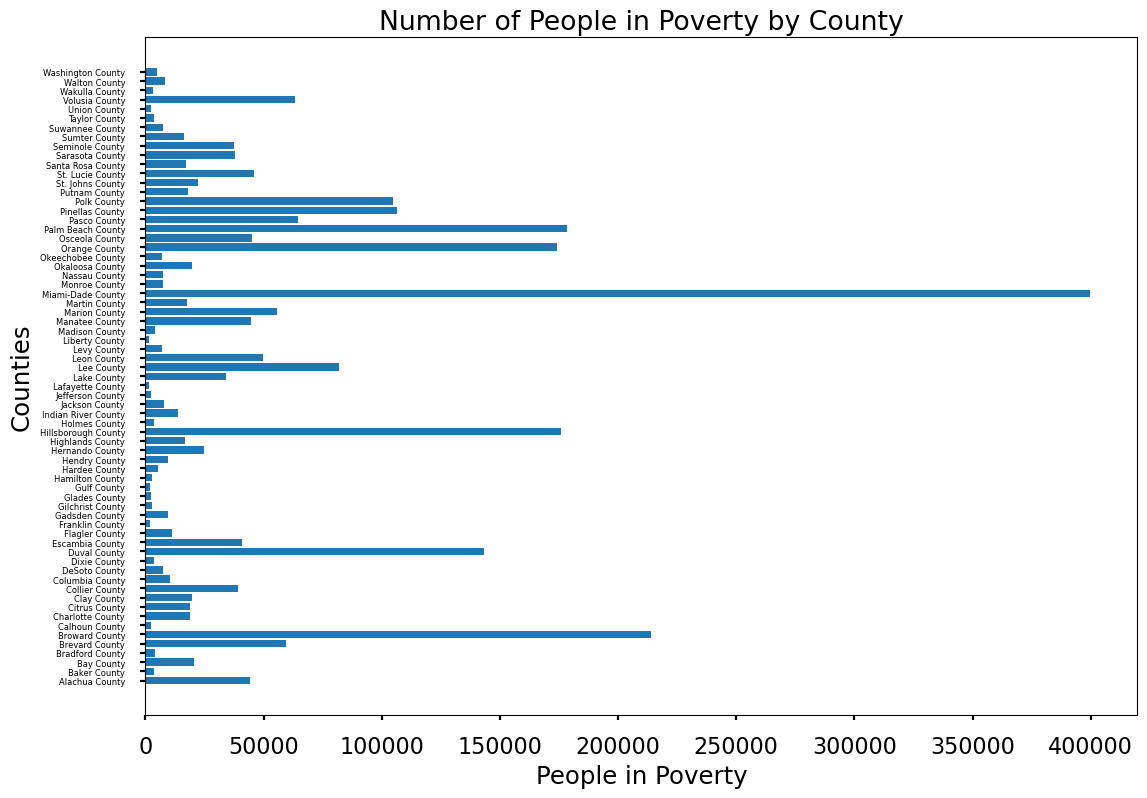

In [34]:
#Create sideways bar graph for median incomes
plt.barh(county_names, county_pov)
#Change county label size to account for 67 counties
plt.rc("ytick", labelsize = 6)
plt.xlabel("People in Poverty")
plt.ylabel("Counties")
plt.title("Number of People in Poverty by County")
plt.show()

#Run twice if counties overlap. Matplot glitch

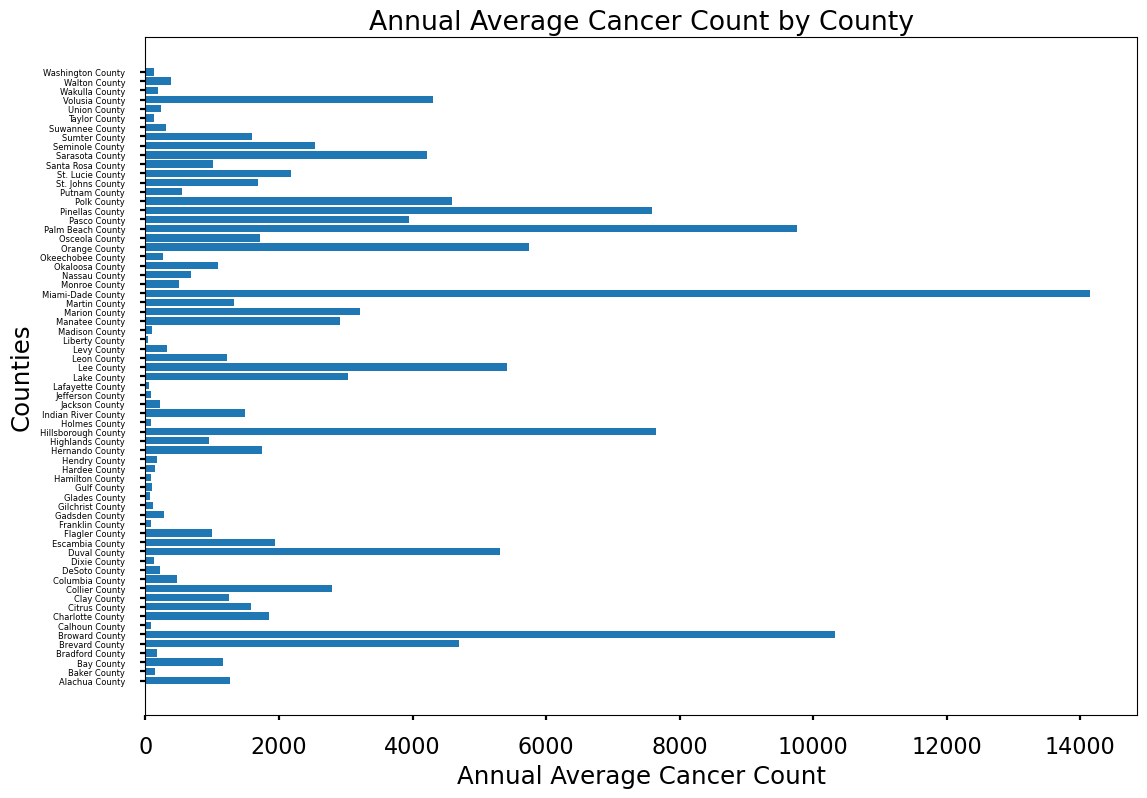

In [32]:
#Create sideways bar graph for median incomes
plt.barh(county_names, county_cancer_total)
#Change county label size to account for 67 counties
plt.rc("ytick", labelsize = 6)
plt.xlabel("Annual Average Cancer Count")
plt.ylabel("Counties")
plt.title("Annual Average Cancer Count by County")
plt.show()

In [37]:
conda install geopandas

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\neeln\anaconda3

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boltons-23.0.0             |   py39haa95532_0         421 KB
    branca-0.6.0               |   py39haa95532_0          43 KB
    click-plugins-1.1.1        |     pyhd3eb1b0_0          10 KB
    cligj-0.7.2                |   py39haa95532_0          14 KB
    conda-23.3.1               |   py39haa95532_0         972 KB
    expat-2.5.0                |       hd77b12b_0         225 KB
    fiona-1.8.22               |   py39hac22706_0         681 KB
    folium-0.14.0         

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\neeln\anaconda3

  added / updated specs:
    - geopandas


The following NEW packages will be INSTALLED:

  boltons            pkgs/main/win-64::boltons-23.0.0-py39haa95532_0 None
  branca             pkgs/main/win-64::branca-0.6.0-py39haa95532_0 None
  click-plugins      pkgs/main/noarch::click-plugins-1.1.1-pyhd3eb1b0_0 None
  cligj              pkgs/main/win-64::cligj-0.7.2-py39haa95532_0 None
  expat              pkgs/main/win-64::expat-2.5.0-hd77b12b_0 None
  fiona              pkgs/main/win-64::fiona-1.8.22-py39hac22706_0 None
  folium             pkgs/main/win-64::folium-0.14.0-py39haa95532_0 None
  freexl             pkgs/main/win-64::freexl-1.0.6-h2bbff1b_0 None
  gd